## **4. Mushroom (1.0 điểm)**

- Tạo tập tin: question_4.ipynb (toàn bộ code của câu 4 sẽ được viết trong file này)
- Cho dữ liệu mushroom trong tập tin mushrooms.csv chứa thông tin của các mẫu nấm,
nấm ăn được và không ăn được.

- Dữ liệu có thể tham khảo và download tại: https://www.kaggle.com/jnduli/decision-tree-classifier-for-mushroom-dataset/data

In [ ]:
# https://drive.google.com/file/d/1D7WuWM9fZKujD2k8Ir395tB8QjUZcQsF/view?usp=sharing
system('gdown --id 1D7WuWM9fZKujD2k8Ir395tB8QjUZcQsF')

In [ ]:
install.packages('BMA')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘DEoptimR’, ‘mvtnorm’, ‘pcaPP’, ‘leaps’, ‘robustbase’, ‘inline’, ‘rrcov’




In [ ]:
install.packages('corrplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('Amelia')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘RcppArmadillo’




In [ ]:
library(tidyverse)
library('BMA')
library(corrplot)
library(Amelia)

Loading required package: Rcpp


Attaching package: ‘Rcpp’


The following object is masked from ‘package:inline’:

    registerPlugin


## 
## Amelia II: Multiple Imputation
## (Version 1.8.0, built: 2021-05-26)
## Copyright (C) 2005-2022 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



In [ ]:
df = read.csv('mushroom.csv')

In [ ]:
print(paste('number of rows: ', dim(df)[1]))
print(paste('number of columns: ', dim(df)[2]))

[1] "number of rows:  8124"
[1] "number of columns:  24"


In [ ]:
head(df)
tail(df)
summary(df)
str(df)

,X,Class,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,⋯,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.type,veil.color,ring.number,ring.type,print,population,habitat
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,Poisonous,x,s,n,t,None,f,c,n,⋯,s,w,w,p,w,o,p,Buff,s,u
2,2,Edible,x,s,y,t,Almonds,f,c,b,⋯,s,w,w,p,w,o,p,Chocolate,n,g
3,3,Edible,b,s,w,t,Fishy,f,c,b,⋯,s,w,w,p,w,o,p,Chocolate,n,m
4,4,Poisonous,x,y,w,t,None,f,c,n,⋯,s,w,w,p,w,o,p,Buff,s,u
5,5,Edible,x,s,g,f,Musty,f,w,b,⋯,s,w,w,p,w,o,e,Chocolate,a,g
6,6,Edible,x,y,y,t,Almonds,f,c,b,⋯,s,w,w,p,w,o,p,Buff,n,g


,X,Class,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,⋯,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.type,veil.color,ring.number,ring.type,print,population,habitat
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
8119,8119,Poisonous,k,y,n,f,Creosote,f,c,n,⋯,s,p,w,p,w,o,e,White,v,d
8120,8120,Edible,k,s,n,f,Musty,a,c,b,⋯,s,o,o,p,o,o,p,Black,c,l
8121,8121,Edible,x,s,n,f,Musty,a,c,b,⋯,s,o,o,p,n,o,p,Black,v,l
8122,8122,Edible,f,s,n,f,Musty,a,c,b,⋯,s,o,o,p,o,o,p,Black,c,l
8123,8123,Poisonous,k,y,n,f,Spicy,f,c,n,⋯,k,w,w,p,w,o,e,White,v,l
8124,8124,Edible,x,s,n,f,Musty,a,c,b,⋯,s,o,o,p,o,o,p,Green,c,l


       X           Class            cap.shape         cap.surface       
 Min.   :   1   Length:8124        Length:8124        Length:8124       
 1st Qu.:2032   Class :character   Class :character   Class :character  
 Median :4062   Mode  :character   Mode  :character   Mode  :character  
 Mean   :4062                                                           
 3rd Qu.:6093                                                           
 Max.   :8124                                                           
  cap.color           bruises              odor           gill.attachment   
 Length:8124        Length:8124        Length:8124        Length:8124       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                           

'data.frame':	8124 obs. of  24 variables:
 $ X                       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Class                   : chr  "Poisonous" "Edible" "Edible" "Poisonous" ...
 $ cap.shape               : chr  "x" "x" "b" "x" ...
 $ cap.surface             : chr  "s" "s" "s" "y" ...
 $ cap.color               : chr  "n" "y" "w" "w" ...
 $ bruises                 : chr  "t" "t" "t" "t" ...
 $ odor                    : chr  "None" "Almonds" "Fishy" "None" ...
 $ gill.attachment         : chr  "f" "f" "f" "f" ...
 $ gill.spacing            : chr  "c" "c" "c" "c" ...
 $ gill.size               : chr  "n" "b" "b" "n" ...
 $ gill.color              : chr  "k" "k" "n" "n" ...
 $ stalk.shape             : chr  "e" "e" "e" "e" ...
 $ stalk.root              : chr  "e" "c" "c" "e" ...
 $ stalk.surface.above.ring: chr  "s" "s" "s" "s" ...
 $ stalk.surface.below.ring: chr  "s" "s" "s" "s" ...
 $ stalk.color.above.ring  : chr  "w" "w" "w" "w" ...
 $ stalk.color.below.ring  : chr  "w" "w" "w" "

<font color = 'red'>**Nhận xét:**</font>
X là continuous,
Các biến khác đều là categorical

In [ ]:
cols = colnames(df)
cols

[1] "X"                        "Class"                   
 [3] "cap.shape"                "cap.surface"             
 [5] "cap.color"                "bruises"                 
 [7] "odor"                     "gill.attachment"         
 [9] "gill.spacing"             "gill.size"               
[11] "gill.color"               "stalk.shape"             
[13] "stalk.root"               "stalk.surface.above.ring"
[15] "stalk.surface.below.ring" "stalk.color.above.ring"  
[17] "stalk.color.below.ring"   "veil.type"               
[19] "veil.color"               "ring.number"             
[21] "ring.type"                "print"                   
[23] "population"               "habitat"

In [ ]:
df[cols[-1]] <- lapply (df[cols[-1]] , factor)

In [ ]:
str(df)

'data.frame':	8124 obs. of  24 variables:
 $ X                       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Class                   : Factor w/ 2 levels "Edible","Poisonous": 2 1 1 2 1 1 1 1 2 1 ...
 $ cap.shape               : Factor w/ 6 levels "b","c","f","k",..: 6 6 1 6 6 6 1 1 6 1 ...
 $ cap.surface             : Factor w/ 4 levels "f","g","s","y": 3 3 3 4 3 4 3 4 4 3 ...
 $ cap.color               : Factor w/ 10 levels "b","c","e","g",..: 5 10 9 9 4 10 9 9 9 10 ...
 $ bruises                 : Factor w/ 2 levels "f","t": 2 2 2 2 1 2 2 2 2 2 ...
 $ odor                    : Factor w/ 9 levels "Almonds","Anise",..: 7 1 4 7 6 1 1 4 7 1 ...
 $ gill.attachment         : Factor w/ 2 levels "a","f": 2 2 2 2 2 2 2 2 2 2 ...
 $ gill.spacing            : Factor w/ 2 levels "c","w": 1 1 1 1 2 1 1 1 1 1 ...
 $ gill.size               : Factor w/ 2 levels "b","n": 2 1 1 2 1 1 1 1 2 1 ...
 $ gill.color              : Factor w/ 12 levels "b","e","g","h",..: 5 5 6 6 5 6 3 6 8 3 ...
 $ stalk.shape   

### **Phân tích sơ bộ các features**

In [ ]:
for(i in cols[-1]){
    print(table(df[i]))
}

Class
   Edible Poisonous 
     4208      3916 
cap.shape
   b    c    f    k    s    x 
 452    4 3152  828   32 3656 
cap.surface
   f    g    s    y 
2320    4 2556 3244 
cap.color
   b    c    e    g    n    p    r    u    w    y 
 168   44 1500 1840 2284  144   16   16 1040 1072 
bruises
   f    t 
4748 3376 
odor
 Almonds    Anise Creosote    Fishy     Foul    Musty     None  Pungent 
     400      192     2160      400       36     3528      256      576 
   Spicy 
     576 
gill.attachment
   a    f 
 210 7914 
gill.spacing
   c    w 
6812 1312 
gill.size
   b    n 
5612 2512 
gill.color
   b    e    g    h    k    n    o    p    r    u    w    y 
1728   96  752  732  408 1048   64 1492   24  492 1202   86 
stalk.shape
   e    t 
3516 4608 
stalk.root
   ?    b    c    e    r 
2480 3776  556 1120  192 
stalk.surface.above.ring
   f    k    s    y 
 552 2372 5176   24 
stalk.surface.below.ring
   f    k    s    y 
 600 2304 4936  284 
stalk.color.above.ring
   b    c    e    g  

In [ ]:
cols[-1]

[1] "Class"                    "cap.shape"               
 [3] "cap.surface"              "cap.color"               
 [5] "bruises"                  "odor"                    
 [7] "gill.attachment"          "gill.spacing"            
 [9] "gill.size"                "gill.color"              
[11] "stalk.shape"              "stalk.root"              
[13] "stalk.surface.above.ring" "stalk.surface.below.ring"
[15] "stalk.color.above.ring"   "stalk.color.below.ring"  
[17] "veil.type"                "veil.color"              
[19] "ring.number"              "ring.type"               
[21] "print"                    "population"              
[23] "habitat"

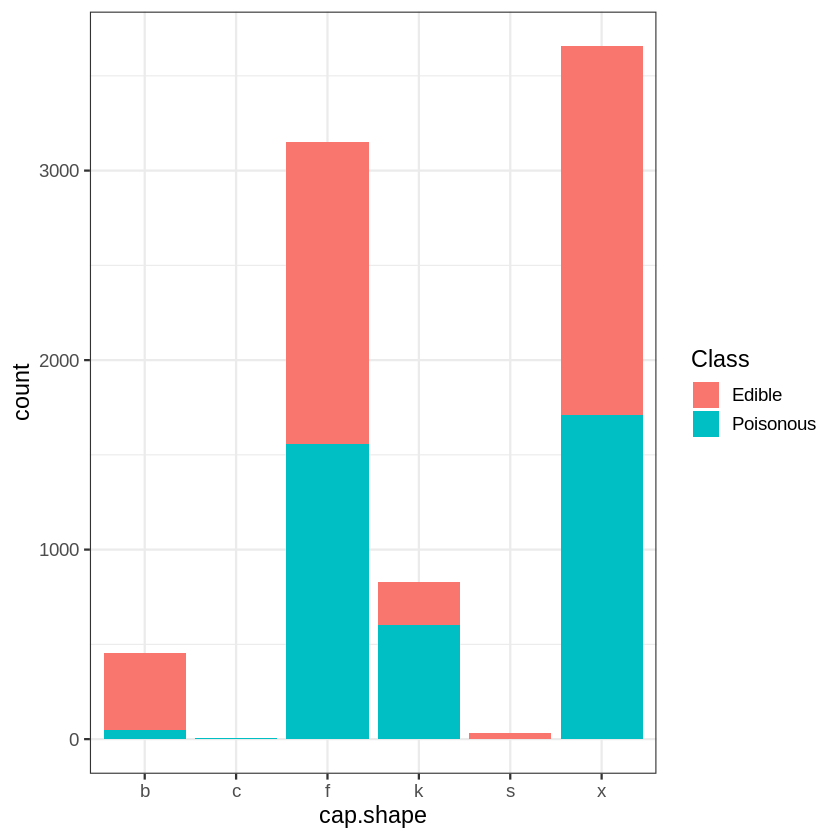

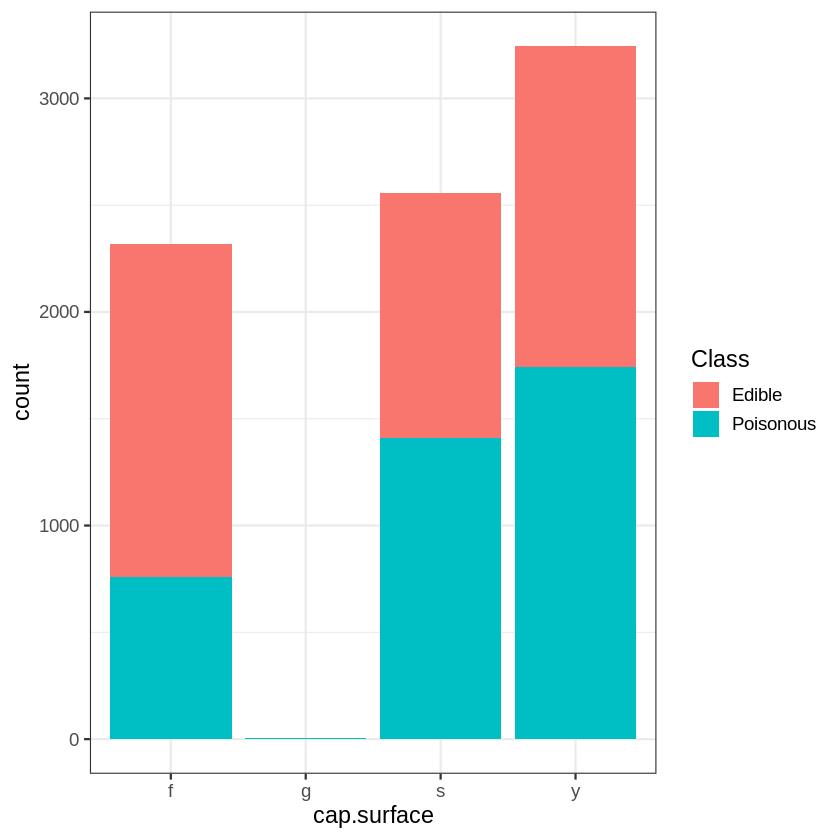

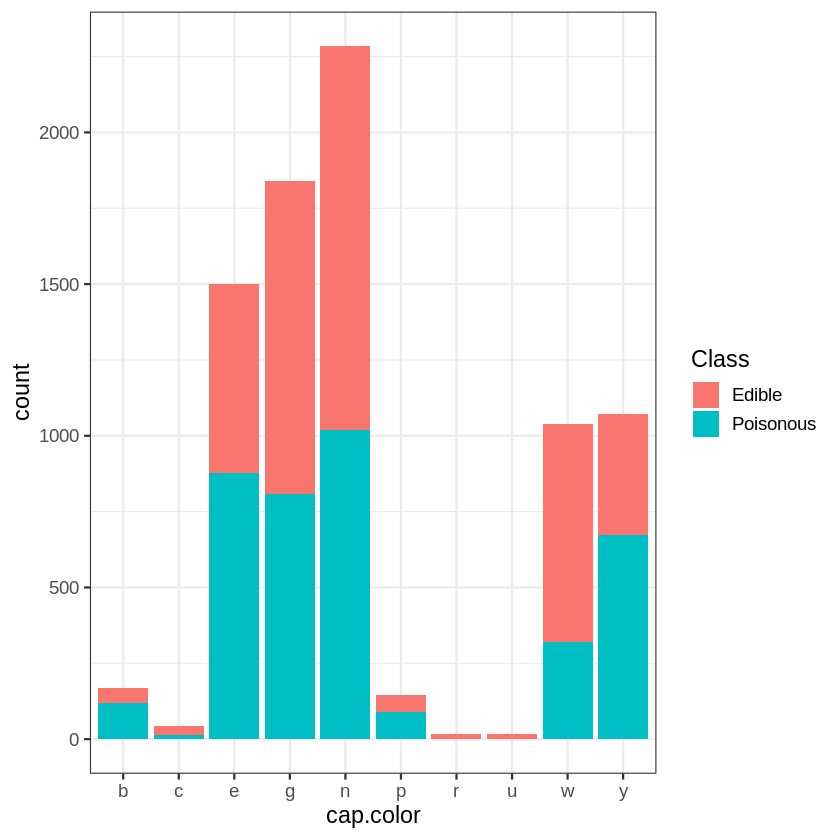

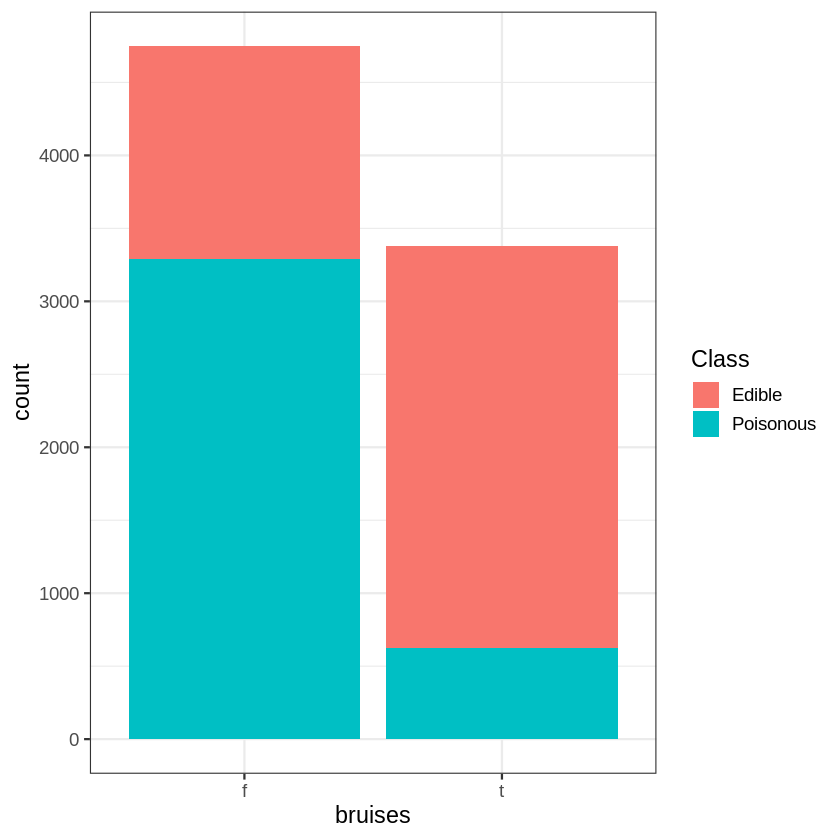

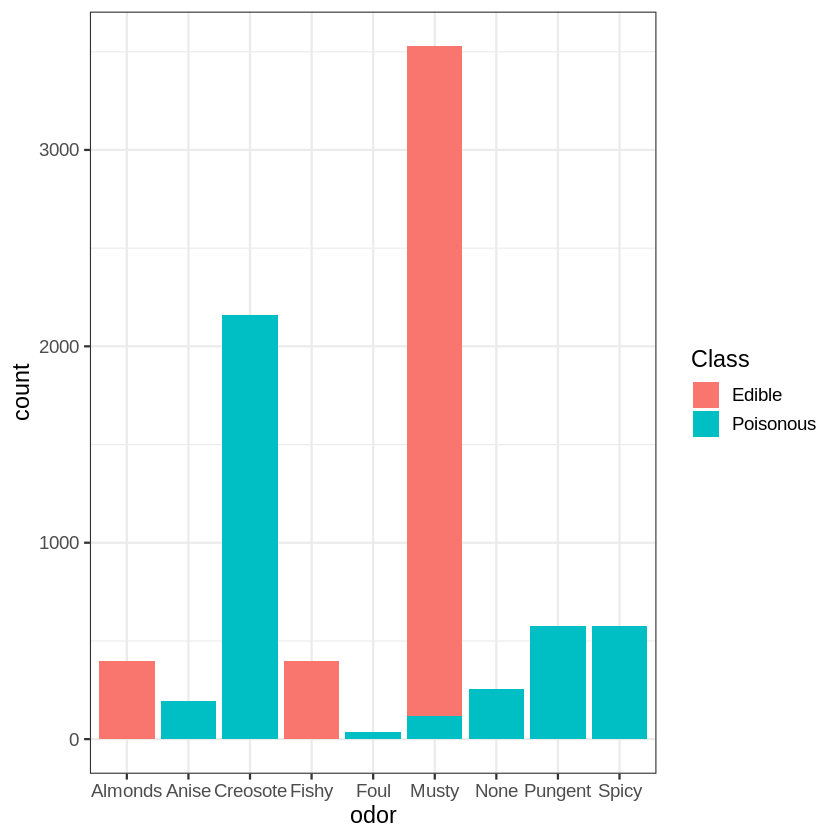

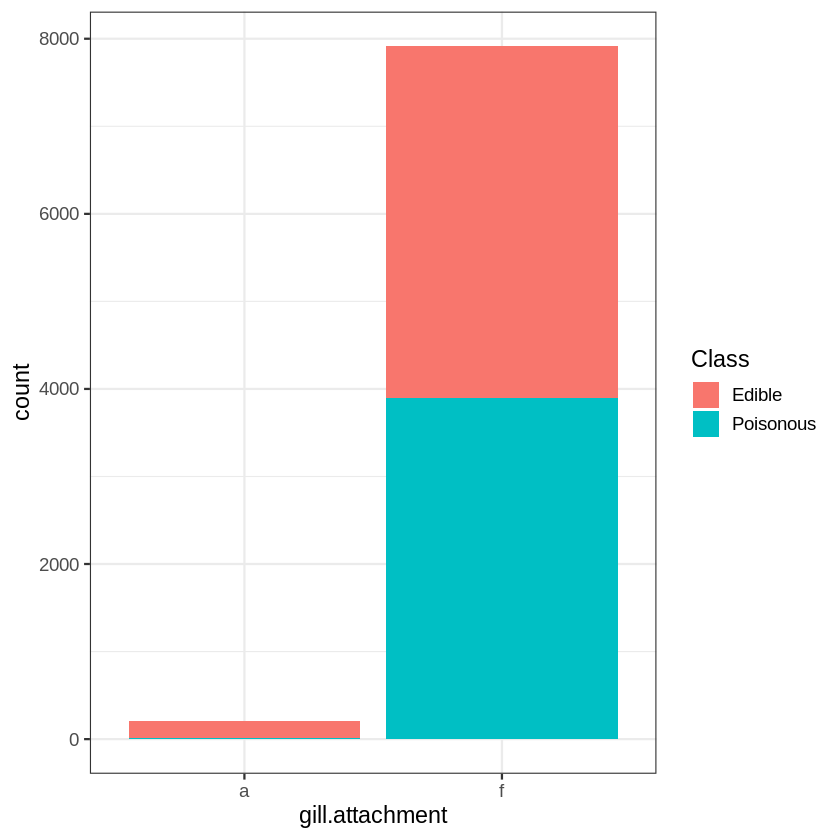

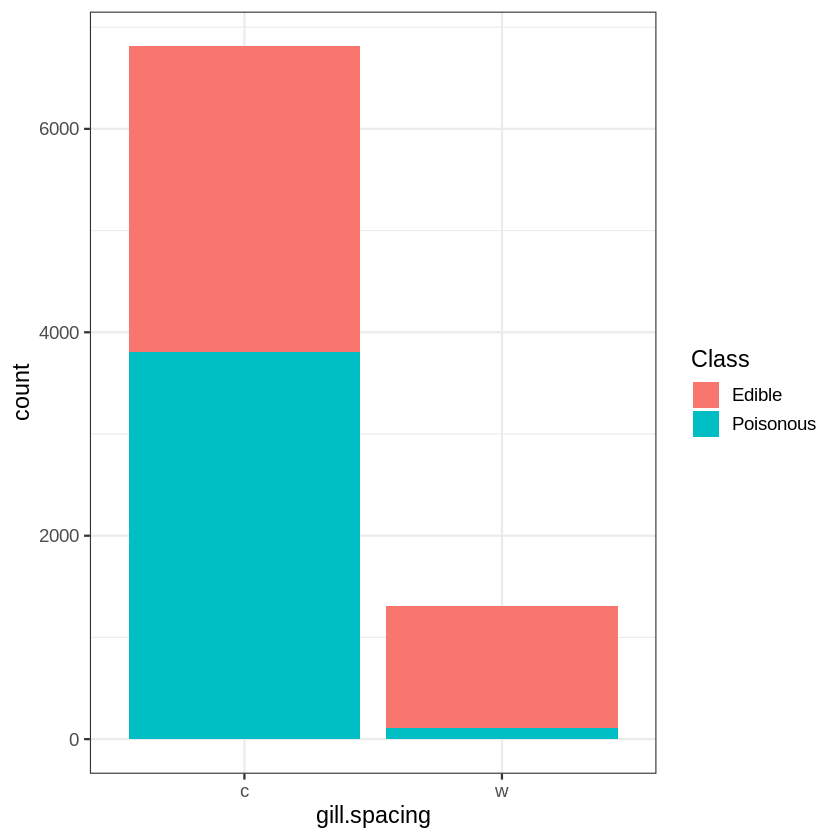

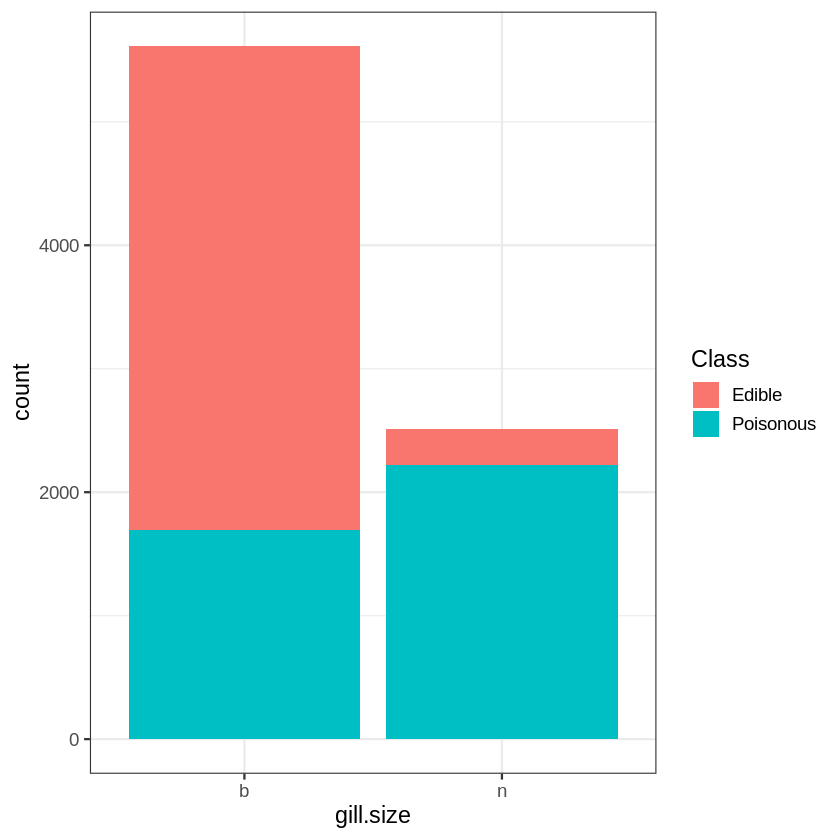

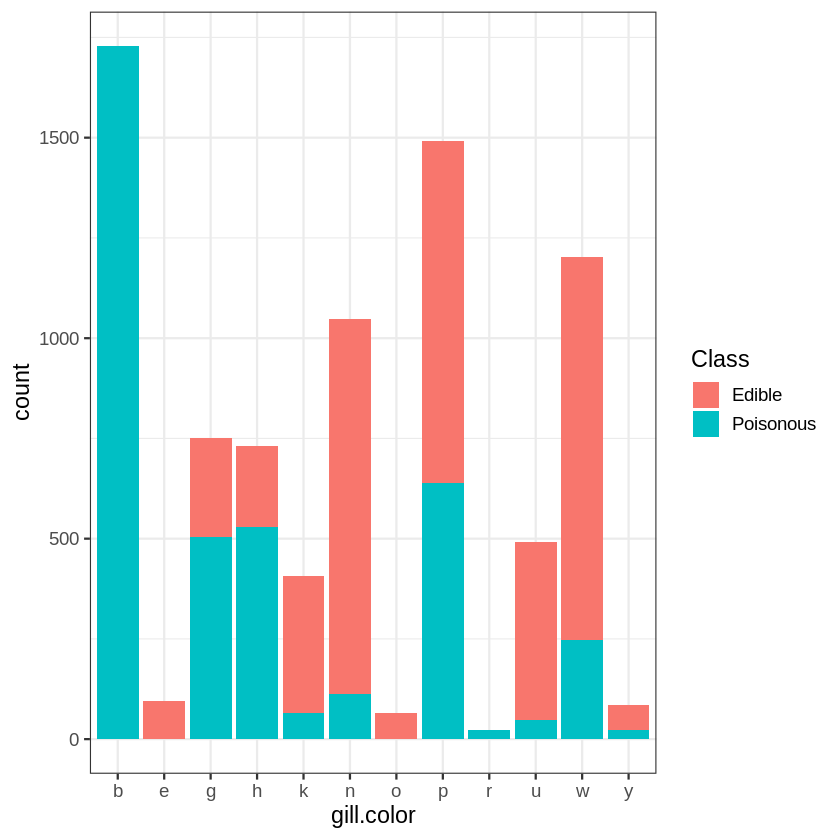

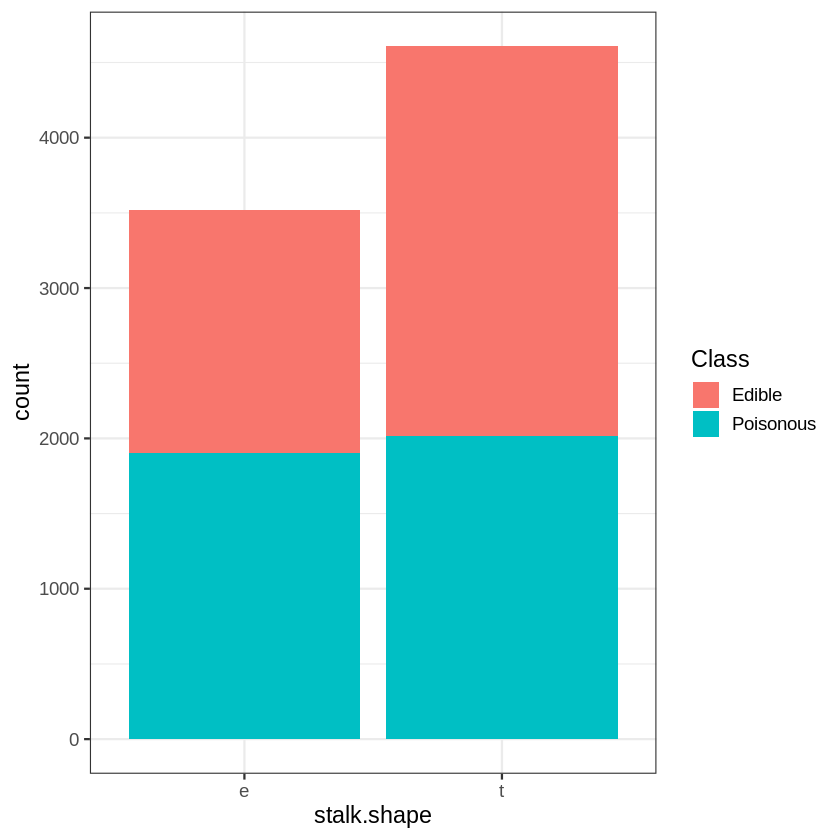

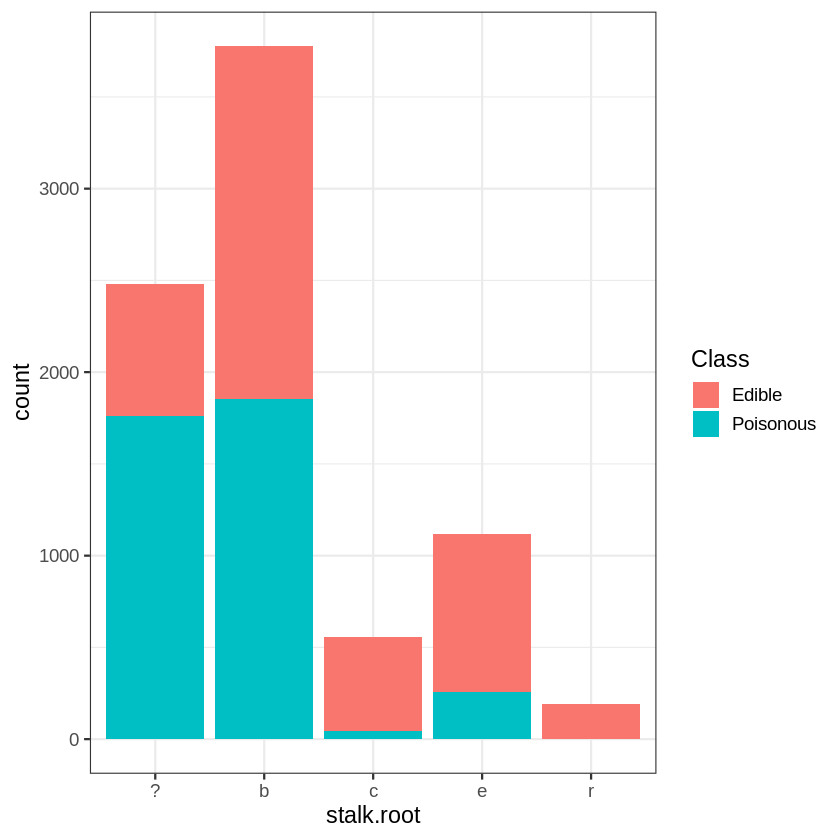

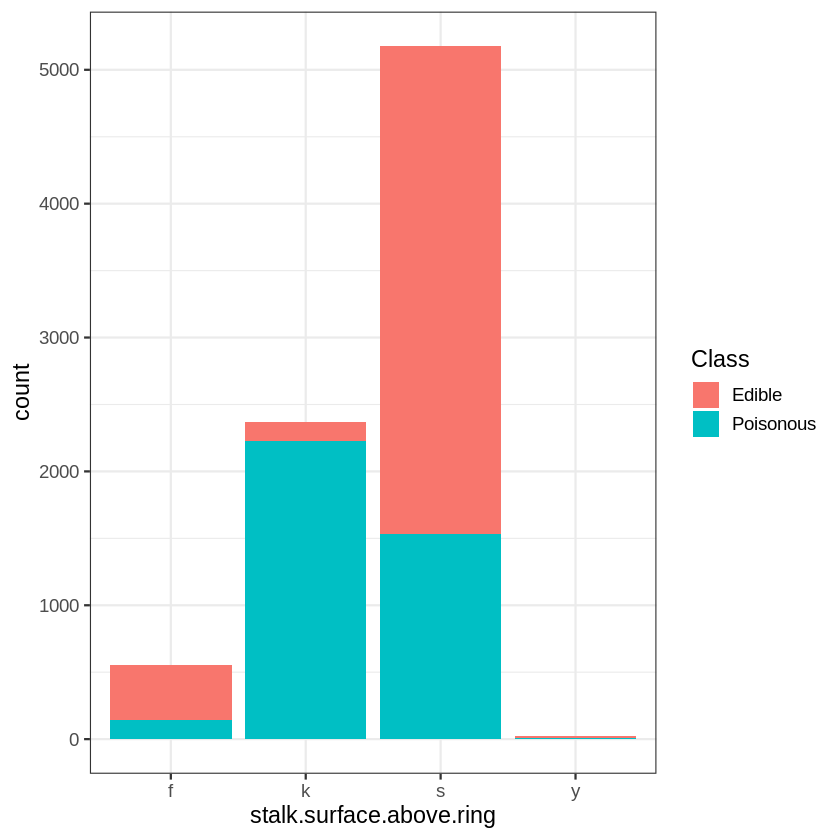

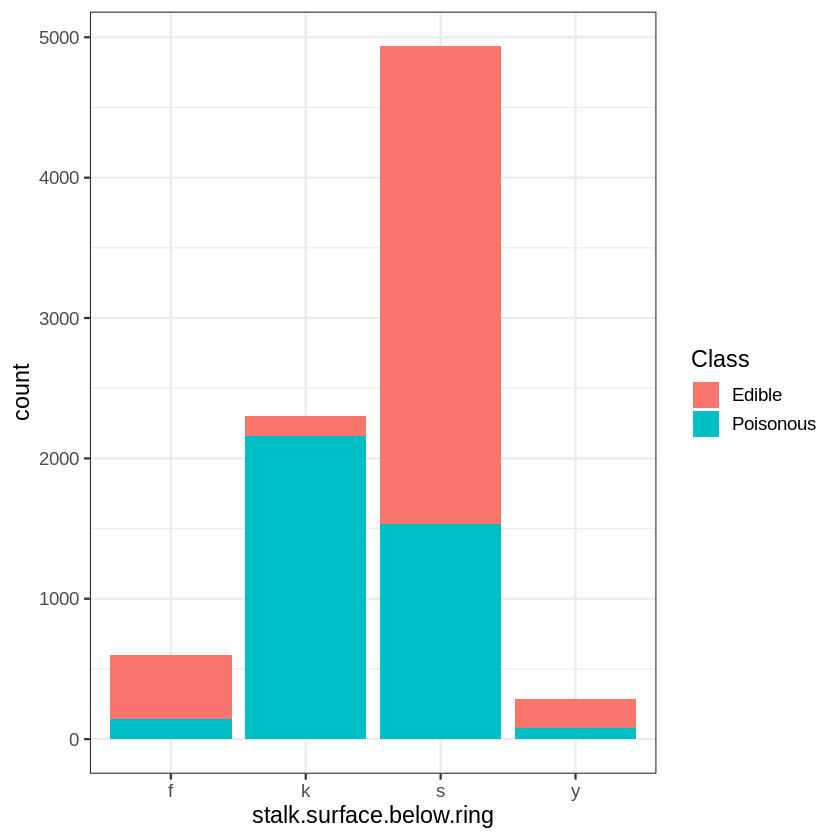

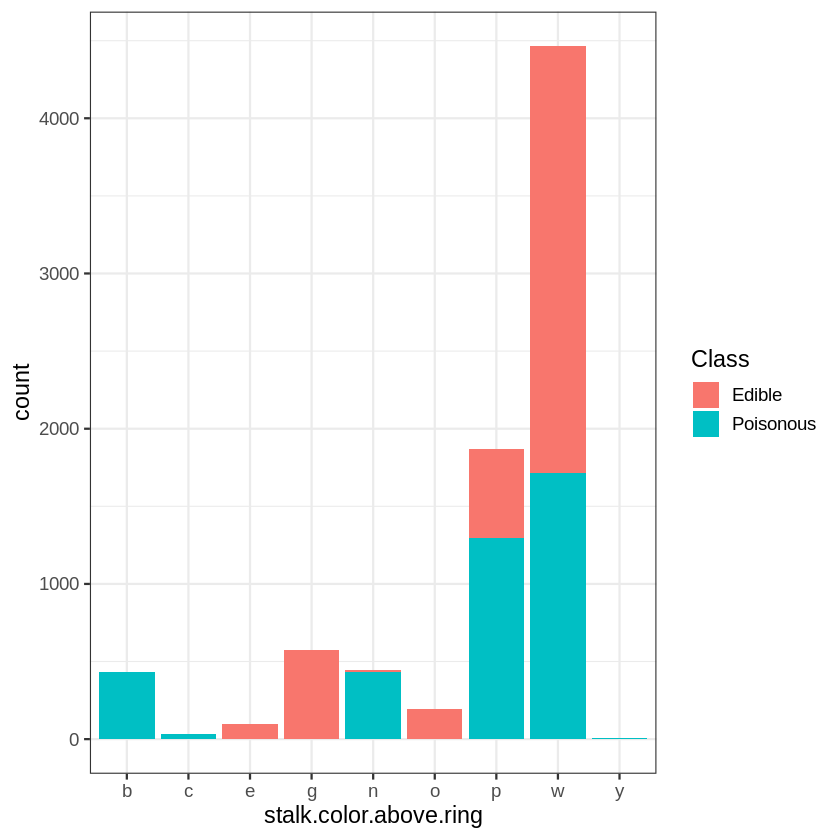

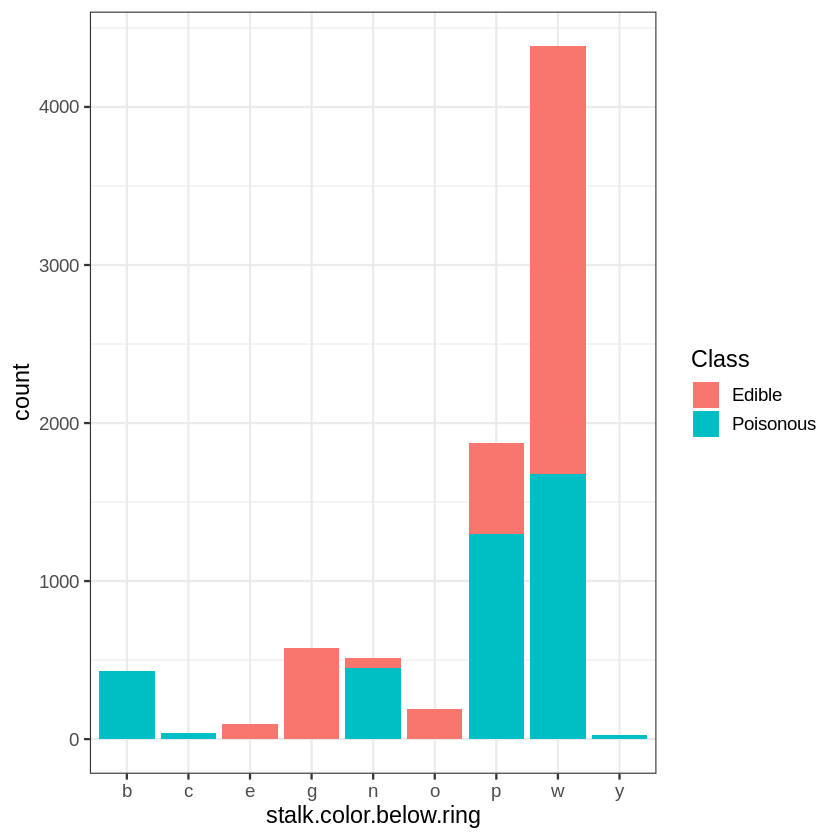

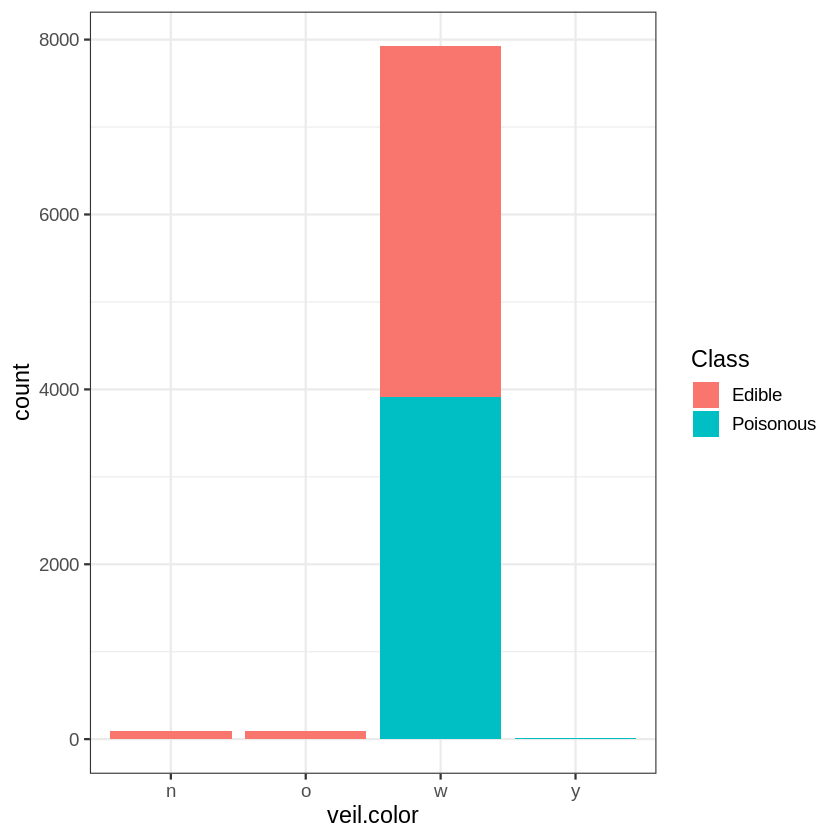

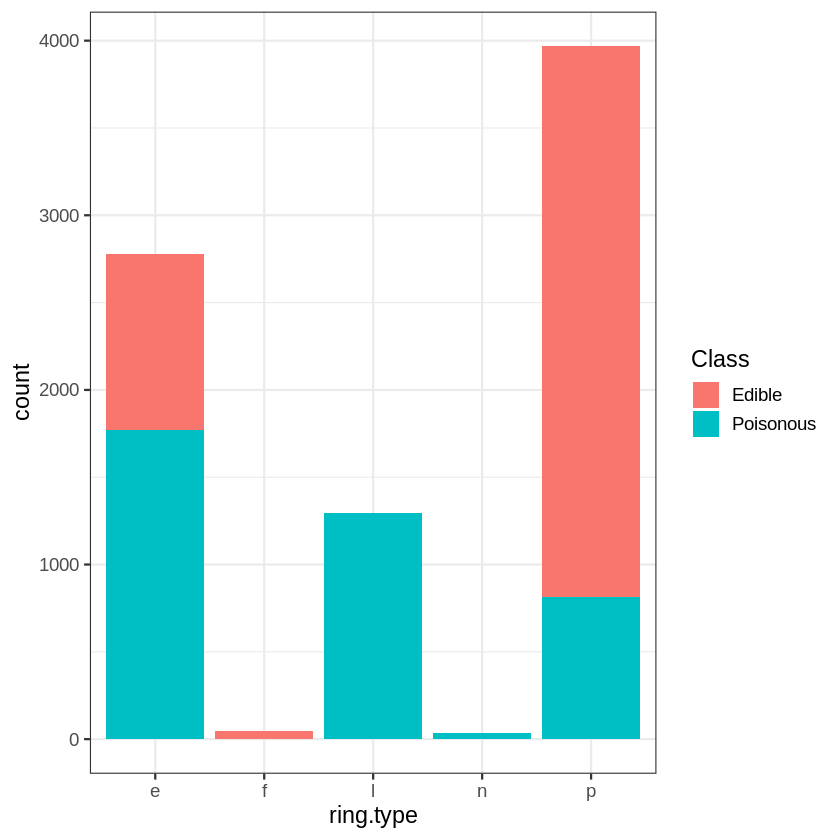

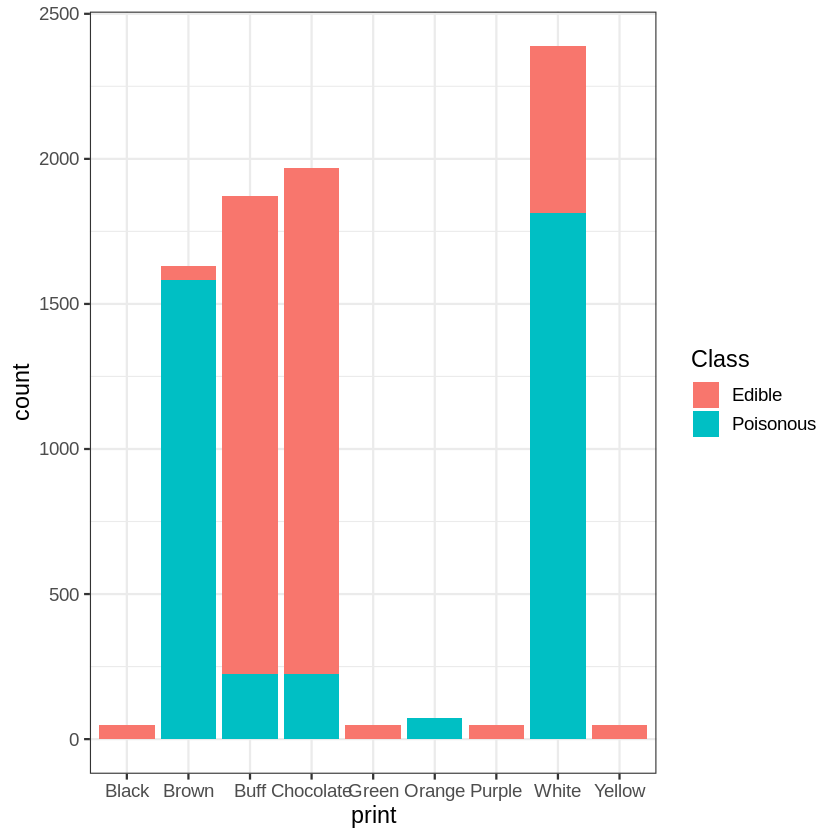

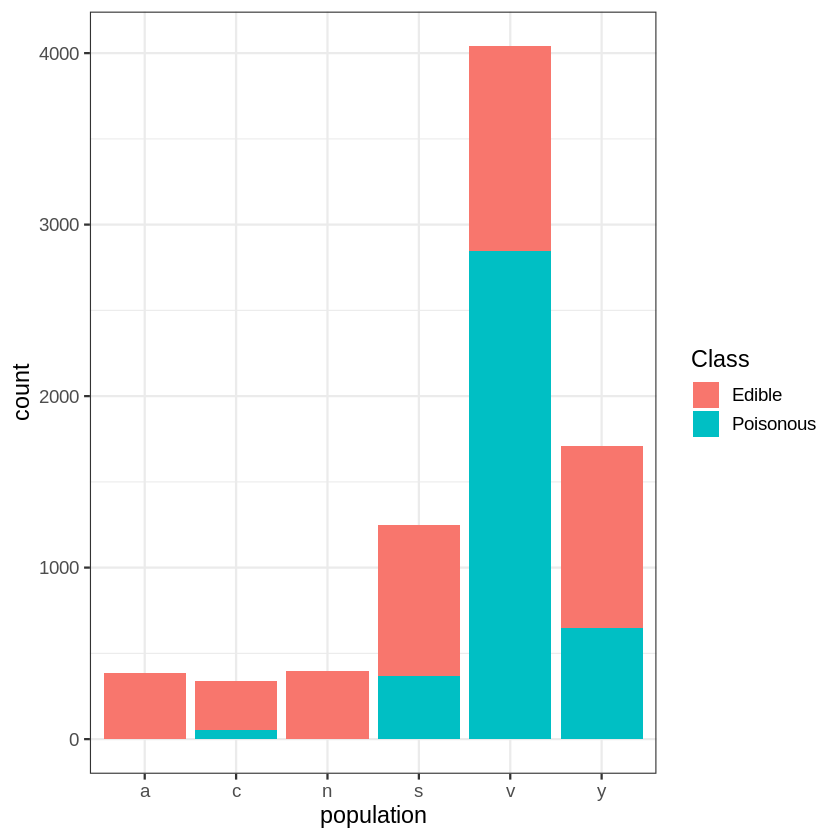

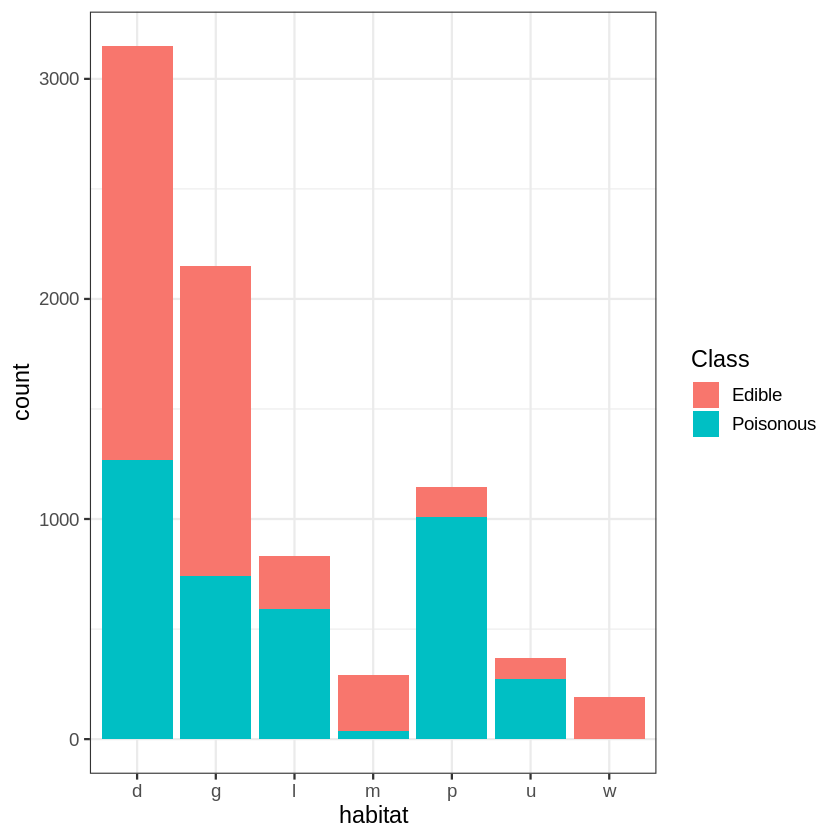

In [ ]:
ggplot(df, aes(fill = Class, x=cap.shape)) + geom_bar()+theme_bw(base_size =14)
ggplot(df, aes(fill = Class, x=cap.surface)) + geom_bar()+theme_bw(base_size =14)
ggplot(df, aes(fill = Class, x=cap.color)) + geom_bar()+theme_bw(base_size =14)
ggplot(df, aes(fill = Class, x=bruises)) + geom_bar()+theme_bw(base_size =14)
ggplot(df, aes(fill = Class, x=odor)) + geom_bar()+theme_bw(base_size =14)
ggplot(df, aes(fill = Class, x=gill.attachment)) + geom_bar()+theme_bw(base_size =14)
ggplot(df, aes(fill = Class, x=gill.spacing)) + geom_bar()+theme_bw(base_size =14)
ggplot(df, aes(fill = Class, x=gill.size)) + geom_bar()+theme_bw(base_size =14)
ggplot(df, aes(fill = Class, x=gill.color)) + geom_bar()+theme_bw(base_size =14)
ggplot(df, aes(fill = Class, x=stalk.shape)) + geom_bar()+theme_bw(base_size =14)
ggplot(df, aes(fill = Class, x=stalk.root)) + geom_bar()+theme_bw(base_size =14)
ggplot(df, aes(fill = Class, x=stalk.surface.above.ring)) + geom_bar()+theme_bw(base_size =14)
ggplot(df, aes(fill = Class, x=stalk.surface.below.ring)) + geom_bar()+theme_bw(base_size =14)
ggplot(df, aes(fill = Class, x=stalk.color.above.ring)) + geom_bar()+theme_bw(base_size =14)
ggplot(df, aes(fill = Class, x=stalk.color.below.ring)) + geom_bar()+theme_bw(base_size =14)
ggplot(df, aes(fill = Class, x=veil.color)) + geom_bar()+theme_bw(base_size =14)
ggplot(df, aes(fill = Class, x=ring.type)) + geom_bar()+theme_bw(base_size =14)
ggplot(df, aes(fill = Class, x=print)) + geom_bar()+theme_bw(base_size =14)
ggplot(df, aes(fill = Class, x=population)) + geom_bar()+theme_bw(base_size =14)
ggplot(df, aes(fill = Class, x=habitat)) + geom_bar()+theme_bw(base_size =14)


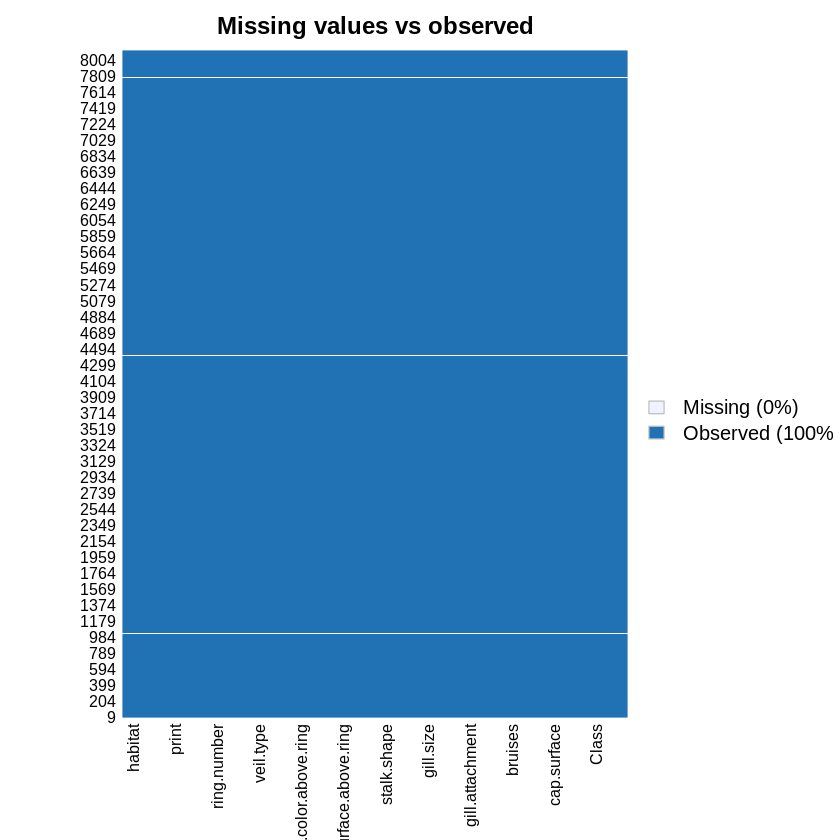

In [ ]:
missmap(df, main = "Missing values vs observed")

In [ ]:
df_new = df

In [ ]:
indx = sapply(df_new , is.factor)
df_new[indx] = lapply(df_new[indx], function(x) as.numeric(as.factor(x)))

In [ ]:
str(df_new)

List of 23
 $ Class                   : num [1:8124] 2 1 1 2 1 1 1 1 2 1 ...
 $ cap.shape               : num [1:8124] 6 6 1 6 6 6 1 1 6 1 ...
 $ cap.surface             : num [1:8124] 3 3 3 4 3 4 3 4 4 3 ...
 $ cap.color               : num [1:8124] 5 10 9 9 4 10 9 9 9 10 ...
 $ bruises                 : num [1:8124] 2 2 2 2 1 2 2 2 2 2 ...
 $ odor                    : num [1:8124] 7 1 4 7 6 1 1 4 7 1 ...
 $ gill.attachment         : num [1:8124] 2 2 2 2 2 2 2 2 2 2 ...
 $ gill.spacing            : num [1:8124] 1 1 1 1 2 1 1 1 1 1 ...
 $ gill.size               : num [1:8124] 2 1 1 2 1 1 1 1 2 1 ...
 $ gill.color              : num [1:8124] 5 5 6 6 5 6 3 6 8 3 ...
 $ stalk.shape             : num [1:8124] 1 1 1 1 2 1 1 1 1 1 ...
 $ stalk.root              : num [1:8124] 4 3 3 4 4 3 3 3 4 3 ...
 $ stalk.surface.above.ring: num [1:8124] 3 3 3 3 3 3 3 3 3 3 ...
 $ stalk.surface.below.ring: num [1:8124] 3 3 3 3 3 3 3 3 3 3 ...
 $ stalk.color.above.ring  : num [1:8124] 8 8 8 8 8 8 8 8 8 8 

In [ ]:
df_new

X,Class,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,⋯,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.type,veil.color,ring.number,ring.type,print,population,habitat
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,6,3,5,2,7,2,1,2,⋯,3,8,8,1,3,2,5,3,4,6
2,1,6,3,10,2,1,2,1,1,⋯,3,8,8,1,3,2,5,4,3,2
3,1,1,3,9,2,4,2,1,1,⋯,3,8,8,1,3,2,5,4,3,4
4,2,6,4,9,2,7,2,1,2,⋯,3,8,8,1,3,2,5,3,4,6
5,1,6,3,4,1,6,2,2,1,⋯,3,8,8,1,3,2,1,4,1,2
6,1,6,4,10,2,1,2,1,1,⋯,3,8,8,1,3,2,5,3,3,2
7,1,1,3,9,2,1,2,1,1,⋯,3,8,8,1,3,2,5,3,3,4
8,1,1,4,9,2,4,2,1,1,⋯,3,8,8,1,3,2,5,4,4,4
9,2,6,4,9,2,7,2,1,2,⋯,3,8,8,1,3,2,5,3,5,2


In [ ]:
table(df_new$Class)


   1    2 
4208 3916 

In [ ]:
# df_new = data.frame(df_new)

In [ ]:
# tao train/test
set.seed(42)
trainingRowIndex <- sample(1:nrow(df_new), 0.7*nrow(df_new))
# trainingRowIndex

#train data
trainData <- df_new[trainingRowIndex, ]
nrow(trainData)

#test
testData <- df_new[-trainingRowIndex, ]
nrow(testData)

[1] 5686

[1] 2438

In [ ]:
# features selection
yvar = df_new[, ('Class')] # biến target
xvars = df_new[, !names(df_new) %in% c('Class')] # biến predict

bma = bicreg(xvars, yvar, strict = F, OR = 2)
bma

Warning message in leaps.setup(x, y, wt = weights, nbest = nbest, nvmax = nvmax, :
“1  linear dependencies found”


Reordering variables and trying again:



Call:
bicreg(x = xvars, y = yvar, strict = F, OR = 2)


 Posterior probabilities(%): 
               cap.shape              cap.surface                cap.color 
                     100                        0                        0 
                 bruises                     odor          gill.attachment 
                     100                      100                      100 
            gill.spacing                gill.size               gill.color 
                     100                      100                      100 
             stalk.shape               stalk.root stalk.surface.above.ring 
                     100                      100                      100 
stalk.surface.below.ring   stalk.color.above.ring   stalk.color.below.ring 
                     100                      100                      100 
               veil.type               veil.color              ring.number 
                       0                      100                      100 
 

In [ ]:
print(summary(bma))


Call:
bicreg(x = xvars, y = yvar, strict = F, OR = 2)


  1  models were selected
 Best  1  models (cumulative posterior probability =  1 ): 

                          p!=0   EV         SD         model 1   
Intercept                 100    0.7415196  5.228e-02   7.415e-01
cap.shape                 100    0.0112142  1.582e-03   1.121e-02
cap.surface                 0    0.0000000  0.000e+00       .    
cap.color                   0    0.0000000  0.000e+00       .    
bruises                   100   -0.0450421  1.107e-02  -4.504e-02
odor                      100   -0.0200804  1.575e-03  -2.008e-02
gill.attachment           100    0.4163590  4.135e-02   4.164e-01
gill.spacing              100   -0.3018019  1.326e-02  -3.018e-01
gill.size                 100    0.5453499  1.061e-02   5.453e-01
gill.color                100   -0.0166175  1.043e-03  -1.662e-02
stalk.shape               100   -0.1483783  9.145e-03  -1.484e-01
stalk.root                100    0.0665138  5.319e-03   6.651e-0

<font color = 'red'>**Nhận xét:**</font>
Sau khi nhìn 1 rừng thông tin từ BMA thì em chọn hết các features để build model

## <font color = 'red'>**Logistics:**</font>


In [ ]:
mylogit = glm(as.factor(Class) ~ ., data = trainData, family='binomial')
print(summary(mylogit))


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = as.factor(Class) ~ ., family = "binomial", data = trainData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.3148  -0.0630   0.0000   0.0569   2.7138  

Coefficients: (1 not defined because of singularities)
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -7.254e+01  1.720e+03  -0.042 0.966355    
X                         2.087e-03  1.148e-04  18.180  < 2e-16 ***
cap.shape                 1.383e-01  5.298e-02   2.611 0.009025 ** 
cap.surface               1.263e-01  8.340e-02   1.514 0.130021    
cap.color                -2.994e-02  3.938e-02  -0.760 0.446960    
bruises                   2.481e+00  4.039e-01   6.142 8.14e-10 ***
odor                     -1.681e+00  1.142e-01 -14.717  < 2e-16 ***
gill.attachment          -9.887e+00  9.272e+02  -0.011 0.991492    
gill.spacing             -1.593e+01  1.145e+00 -13.909  < 2e-16 ***
gill.size                 1.742e+01  1.010e+00  17.237  < 2e-16 ***


Các features có * là các features quan trọng trong model

In [ ]:
pred = predict(mylogit, newdata = testData, type = 'response')
pred_value = ifelse(pred>0.5, 2, 1)

print('Testdata Class vs predict: (20 rows)')
res = data.frame(testCLass = testData$Class[20:40], pred_value[20:40])
head(res)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


[1] "Testdata Class vs predict: (20 rows)"


,testCLass,pred_value.20.40.
,<dbl>,<dbl>
70,1,1
75,1,1
78,1,1
85,1,1
86,1,1
89,1,1


### **Evaluation**

In [ ]:
install.packages('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
library('caret')

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:survival’:

    cluster


The following object is masked from ‘package:purrr’:

    lift




In [ ]:
misClasificError = mean(pred_value != testData$Class)
acc2 = 1 - misClasificError
print(paste('acc: ', acc2))

[1] "acc:  0.968416735028712"


In [ ]:
confusionMatrix(as.factor(pred_value), as.factor(testData$Class))

Confusion Matrix and Statistics

          Reference
Prediction    1    2
         1 1233   46
         2   31 1128
                                         
               Accuracy : 0.9684         
                 95% CI : (0.9607, 0.975)
    No Information Rate : 0.5185         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.9367         
                                         
 Mcnemar's Test P-Value : 0.1106         
                                         
            Sensitivity : 0.9755         
            Specificity : 0.9608         
         Pos Pred Value : 0.9640         
         Neg Pred Value : 0.9733         
             Prevalence : 0.5185         
         Detection Rate : 0.5057         
   Detection Prevalence : 0.5246         
      Balanced Accuracy : 0.9681         
                                         
       'Positive' Class : 1              
                                         

<font color = 'red'>**Nhận xét:**</font>
ACC cao, các giá trị của confusionMatrix cho thấy model dự đoán đúng nhiều giá trị
=> model thích hợp sử dụng

In [ ]:
cols

[1] "X"                        "Class"                   
 [3] "cap.shape"                "cap.surface"             
 [5] "cap.color"                "bruises"                 
 [7] "odor"                     "gill.attachment"         
 [9] "gill.spacing"             "gill.size"               
[11] "gill.color"               "stalk.shape"             
[13] "stalk.root"               "stalk.surface.above.ring"
[15] "stalk.surface.below.ring" "stalk.color.above.ring"  
[17] "stalk.color.below.ring"   "veil.type"               
[19] "veil.color"               "ring.number"             
[21] "ring.type"                "print"                   
[23] "population"               "habitat"

In [ ]:
### dự đoán vài giá trị mới
y1 <- predict(mylogit, 
 newdata = data.frame(  X = 6,
                        cap.shape = 1,
                        cap.surface = 2,
                        cap.color = 1,
                        bruises = 1,
                        odor = 2,
                        gill.attachment = 1,
                        gill.spacing = 2,
                        gill.size = 1,
                        gill.color = 2,
                        stalk.shape = 1,
                        stalk.root = 2,
                        stalk.surface.above.ring = 1,
                        stalk.surface.below.ring = 2,
                        stalk.color.above.ring = 1,
                        stalk.color.below.ring = 2,
                        veil.type = 1,
                        veil.color = 2,
                        ring.number = 1,
                        ring.type = 2,
                        print = 1,
                        population = 1,
                        habitat = 1),
                        type='response')


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


In [ ]:
y1 <- ifelse(y1 > 0.5, 2, 1)
print("results:")
print(y1)

[1] "results:"
1 
1 


## <font color = 'red'>**Decision Tree:**</font>


In [ ]:
library(rpart)

In [ ]:
df.tree = rpart(Class ~ ., data = trainData, method = 'class')

In [ ]:
df.tree

n= 5686 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 5686 2742 1 (0.51776293 0.48223707)  
    2) X< 3864.5 2676  414 1 (0.84529148 0.15470852)  
      4) odor< 6.5 2480  218 1 (0.91209677 0.08790323)  
        8) print>=2.5 2353   91 1 (0.96132597 0.03867403)  
         16) gill.size< 1.5 2124    0 1 (1.00000000 0.00000000) *
         17) gill.size>=1.5 229   91 1 (0.60262009 0.39737991)  
           34) X< 2114.5 138    0 1 (1.00000000 0.00000000) *
           35) X>=2114.5 91    0 2 (0.00000000 1.00000000) *
        9) print< 2.5 127    0 2 (0.00000000 1.00000000) *
      5) odor>=6.5 196    0 2 (0.00000000 1.00000000) *
    3) X>=3864.5 3010  682 2 (0.22657807 0.77342193)  
      6) ring.number>=2.5 421   45 1 (0.89311164 0.10688836)  
       12) print>=7 376    0 1 (1.00000000 0.00000000) *
       13) print< 7 45    0 2 (0.00000000 1.00000000) *
      7) ring.number< 2.5 2589  306 2 (0.11819235 0.88180765)  
       14) veil.color< 2.5 142    0 1 

các row có * nghĩa là trong model này, features đó thuần khiết (nhiều quá e viết ko hết:))

In [ ]:
install.packages('rpart.plot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(rpart.plot)

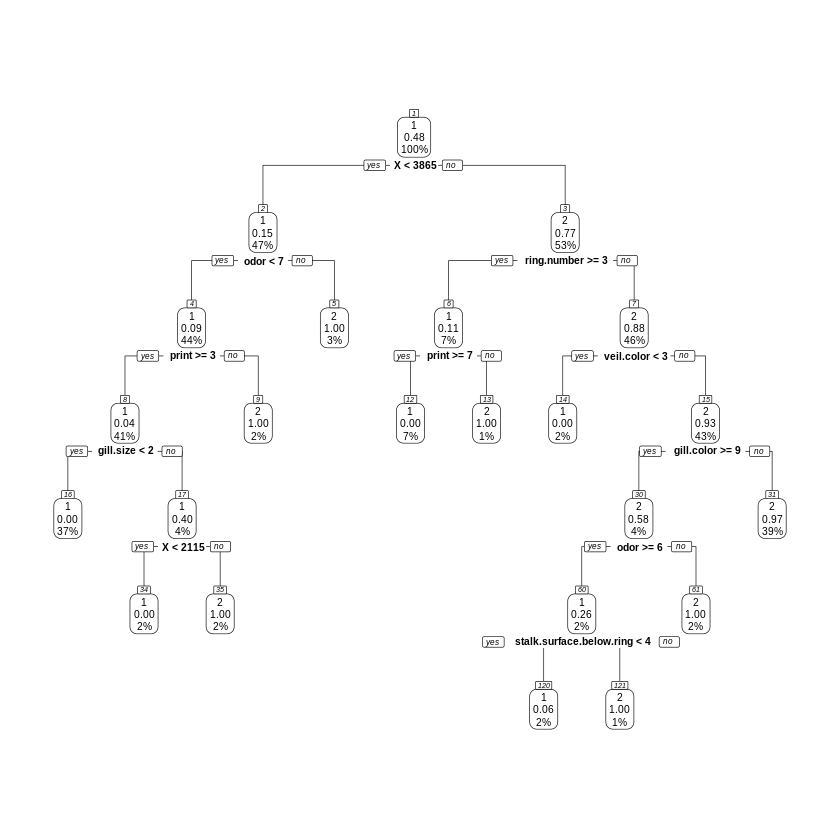

In [ ]:
prp(df.tree, type = 2, extra = 'auto', nn = TRUE, branch = 1, varlen = 0, yesno = 2)

In [ ]:
#test model
pred_new = predict(df.tree, testData, type = "vector")

# mean square error of testData
mse_test = mean((testData$Class - pred_new)^2)
print(paste("mse in test: ", mse_test))

[1] "mse in test:  0.007383100902379"


In [ ]:
# accuracy
y_pred = predict(df.tree, testData, type = 'class')
result = table(y_pred, testData$Class)
result

acc = sum(diag(result)/sum(result))
print(paste('Acc = ', acc))

      
y_pred    1    2
     1 1247    1
     2   17 1173

[1] "Acc =  0.992616899097621"


<font color = 'red'>**Nhận xét:**</font>
- ACC cao (>0.99, gần = 1)
- MSE nhỏ (0.007)
=> model decision tree áp dụng cho dataset này còn tốt hơn cả logistics 
=> chọn model này

In [ ]:
### dự đoán vài giá trị mới
y1 <- predict(mylogit, 
 newdata = data.frame(  X = 10,
                        cap.shape = 1,
                        cap.surface = 2,
                        cap.color = 1,
                        bruises = 2,
                        odor = 2,
                        gill.attachment = 1,
                        gill.spacing = 2,
                        gill.size = 1,
                        gill.color = 2,
                        stalk.shape = 1,
                        stalk.root = 2,
                        stalk.surface.above.ring = 2,
                        stalk.surface.below.ring = 2,
                        stalk.color.above.ring = 1,
                        stalk.color.below.ring = 2,
                        veil.type = 2,
                        veil.color = 2,
                        ring.number = 1,
                        ring.type = 2,
                        print = 1,
                        population = 1,
                        habitat = 1),
                        type='response')


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


In [ ]:
y1 <- ifelse(y1 > 0.5, 2, 1)
print("results:")
print(y1)

[1] "results:"
1 
1 
